In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(
    rc={
        "axes.labelsize": 12,
        "axes.titlesize": 16,
        "figure.figsize": (10, 7.5),
        "figure.dpi": 200,
        "figure.edgecolor": "k",
        "figure.facecolor": "w",
    }
)

In [2]:
df = pd.read_feather("2022.ft")
df

,county,gov_22_total2,gov_22_whitmer,gov_22_dixon,gov_22_buzuma,gov_22_brandenburg,gov_22_hogan,gov_22_simpson,gov_22_total,gov_22_whitmer_pct,...,prop2_22_no,prop2_22_total,prop2_22_yes_pct,prop2_22_no_pct,prop3_22_total2,prop3_22_yes,prop3_22_no,prop3_22_total,prop3_22_yes_pct,prop3_22_no_pct
0,Wayne,645124,457064,180426,3921,1697,1411,605,645124,0.708490,...,177603,617091,0.712193,0.287807,629761,429882,199879,629761,0.682611,0.317389
1,Oakland,629374,383391,238137,5001,1253,1188,404,629374,0.609162,...,216255,606413,0.643387,0.356613,619952,396224,223728,619952,0.639120,0.360880
2,Macomb,384541,199277,179259,3144,1690,809,362,384541,0.518220,...,153814,365493,0.579160,0.420840,372701,205350,167351,372701,0.550978,0.449022
3,Kent,299095,162680,131626,2963,922,636,268,299095,0.543907,...,116826,290579,0.597954,0.402046,294117,161025,133092,294117,0.547486,0.452514
4,Washtenaw,180845,135902,42803,1277,303,451,109,180845,0.751483,...,40203,176968,0.772823,0.227177,179208,136354,42854,179208,0.760870,0.239130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Schoolcraft,3884,1524,2264,45,33,8,10,3884,0.392379,...,1872,3755,0.501465,0.498535,3806,1728,2078,3806,0.454020,0.545980
79,Baraga,3444,1329,2056,32,16,8,3,3444,0.385889,...,1735,3339,0.480383,0.519617,3384,1469,1915,3384,0.434102,0.565898
80,Ontonagon,3259,1319,1862,27,29,15,7,3259,0.404725,...,1424,3150,0.547937,0.452063,3166,1553,1613,3166,0.490524,0.509476
81,Luce,2366,786,1520,20,19,12,9,2366,0.332206,...,1148,2288,0.498252,0.501748,2318,960,1358,2318,0.414150,0.585850


In [3]:
df2 = pd.read_feather("2018.ft")

In [4]:
df = df.merge(df2, on="county")

In [5]:
df.columns

Index(['county', 'gov_22_total2', 'gov_22_whitmer', 'gov_22_dixon',
       'gov_22_buzuma', 'gov_22_brandenburg', 'gov_22_hogan', 'gov_22_simpson',
       'gov_22_total', 'gov_22_whitmer_pct', 'gov_22_dixon_pct',
       'gov_22_buzuma_pct', 'gov_22_brandenburg_pct', 'gov_22_hogan_pct',
       'gov_22_simpson_pct', 'sos_22_total2', 'sos_22_benson', 'sos_22_karamo',
       'sos_22_stempfle', 'sos_22_schwartz', 'sos_22_hutchinson',
       'sos_22_total', 'sos_22_benson_pct', 'sos_22_karamo_pct',
       'sos_22_stempfle_pct', 'sos_22_schwartz_pct', 'sos_22_hutchinson_pct',
       'ag_22_total2', 'ag_22_nessel', 'ag_22_deperno', 'ag_22_mchugh',
       'ag_22_van_sickle', 'ag_22_total', 'ag_22_nessel_pct',
       'ag_22_deperno_pct', 'ag_22_mchugh_pct', 'ag_22_van_sickle_pct',
       'prop1_22_total2', 'prop1_22_yes', 'prop1_22_no', 'prop1_22_total',
       'prop1_22_yes_pct', 'prop1_22_no_pct', 'prop2_22_total2',
       'prop2_22_yes', 'prop2_22_no', 'prop2_22_total', 'prop2_22_yes_pct',
  

Text(0.5, 0, '2018 Nessel (%)')

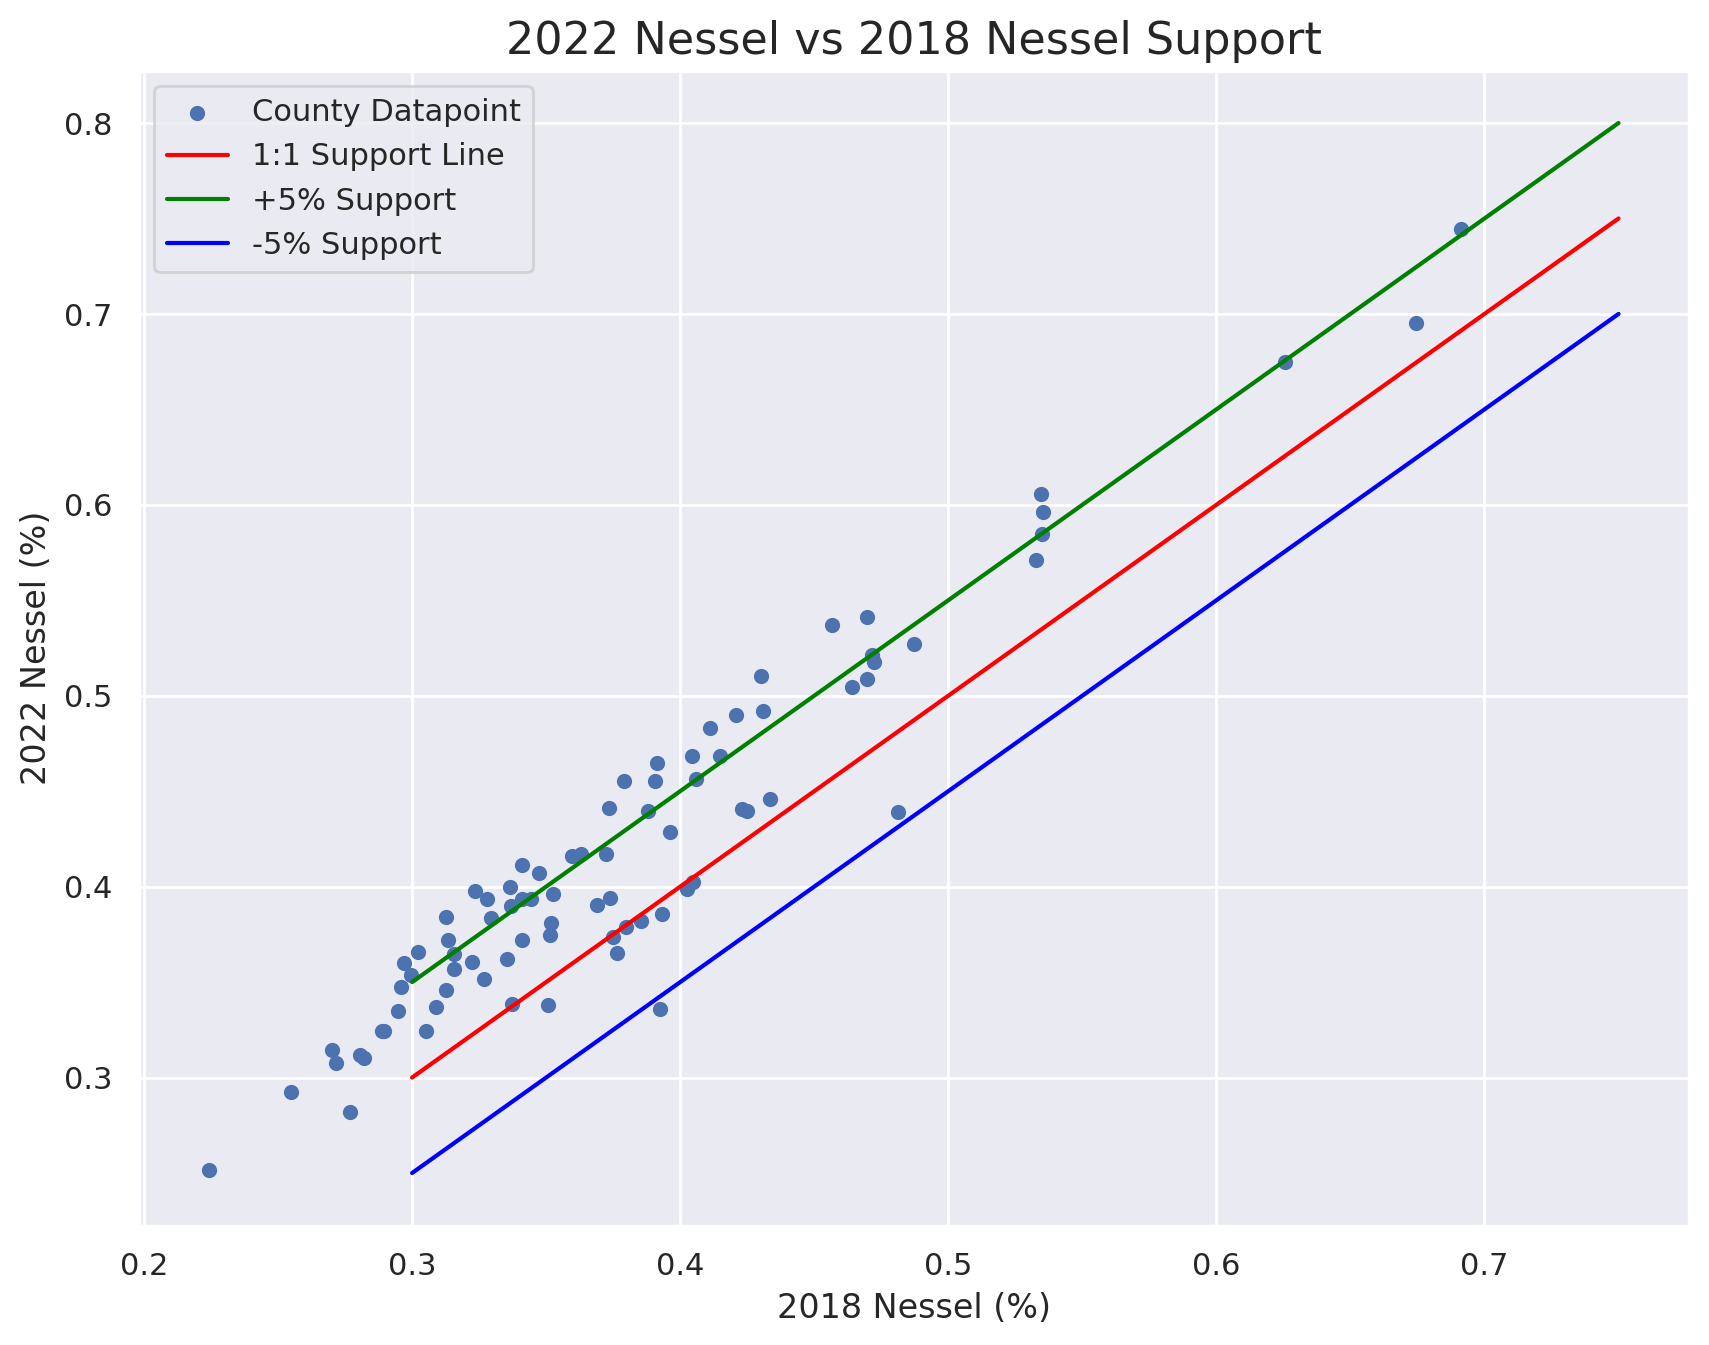

In [7]:
ax = df.plot(x="ag_18_nesseld_pct", y="ag_22_nessel_pct", kind="scatter")
ax.plot([0.3, 0.75], [0.3, 0.75], color="red")
ax.plot([0.3, 0.75], [0.35, 0.8], color="green")
ax.plot([0.3, 0.75], [0.25, 0.7], color="blue")
plt.legend(["County Datapoint", "1:1 Support Line", "+5% Support", "-5% Support"])
plt.title("2022 Nessel vs 2018 Nessel Support")
plt.ylabel("2022 Nessel (%)")
plt.xlabel("2018 Nessel (%)")

In [28]:
df["nessel_ratio"] = np.round(df["ag_22_nessel_pct"] / df["ag_18_nesseld_pct"], 2)
df["nessel_margin"] = np.round(df["ag_22_nessel"] - df["ag_18_nesseld"], 2)

Counties where Nessel's support was <95% of what it was in 2018.

In [ ]:
l = df["nessel_ratio"] < 0.95
cols = [
    "county",
    "ag_18_nesseld",
    "ag_22_nessel",
    "ag_18_nesseld_pct",
    "ag_22_nessel_pct",
    "ne336109ssel_ratio",
    "nessel_margin",
]

In [30]:
df[l][cols].sort_values(by="nessel_margin")

,county,ag_18_nesseld,ag_22_nessel,ag_18_nesseld_pct,ag_22_nessel_pct,nessel_ratio,nessel_margin
70,Gogebic,3050,2781,0.481148,0.438990,0.91,-269
64,Menominee,3383,3189,0.392596,0.336109,0.86,-194
